In [2]:
# pip install ipympl
%matplotlib widget
from logparser import get_events_from
from plotter import plot_gc, plot_gc_hex
from GarbageCollector import MemBalancer
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def plot_membalancer_heap_rule(events, fignum):
    time_threshold = [0]
    heap_limit = [events[4]["new-threshold"]]
    nursery_size = events[4]["nursery-size"]
    mem_balancer = MemBalancer(nursery_size=nursery_size, TUNING=0.0001)
    mem_balancer.s_m_smoothed = 1
    mem_balancer.s_t_smoothed = 1
    mem_balancer.L_smoothed = events[5]["memory-before-collect"]
    total_memory_used_last_minor = 0
    acc = 0
    for event in events[1:]:
        if event["task"] == "gc-minor":
            acc += event["time-last-minor-gc"]
            #total_memory_used = event["memory-before-collect"]
            total_memory_used = event["total-memory-used"]
            g_m_next = total_memory_used - total_memory_used_last_minor
            if g_m_next >= 0:
            # memory allocated since last heartbeat
                g_m = g_m_next
                print(f"g_m: {g_m}")
            else:
                #g_m = 0
                print(f"g_m_next: {g_m_next}")
            total_memory_used_last_minor = event["total-memory-used"]
            g_t = event["time-last-minor-gc"]  # time since last heartbeat
            mem_balancer.on_heartbeat(g_m, g_t)
            time_threshold.append(acc)
            heap_limit.append(mem_balancer.compute_M())
            print(f"heap_limit: {mem_balancer.heap_limit}, E: {
                  mem_balancer.E}")
        elif event["task"] == "gc-collect-step":
            if "SCANNING" in event["text"]:
                print("major collect start")
                time_taken = event["time-taken"]
                gc_start = acc
            else:
                time_taken += event["time-taken"]
        elif event["task"] == "gc-collect-done":
            time_threshold.append(acc)
            bytes_collected = event["bytes-collected"]
            time_taken += event["time-taken"]
            gc_end = acc + event["time-taken"]
            live_memory = event["total-memory-used"]
            mem_balancer.on_gc(bytes_collected, time_taken, live_memory)
            #mem_balancer.on_heartbeat()
            print(f"s_m_smoothed: {mem_balancer.s_m_smoothed}, s_t_smoothed: {mem_balancer.s_t_smoothed}, g_m_smoothed: {mem_balancer.g_m_smoothed}, g_t_smoothed: {mem_balancer.g_t_smoothed}")
            heap_limit.append(mem_balancer.compute_M())
            print(f"heap_limit: {mem_balancer.heap_limit}, E: {mem_balancer.E}")
            print("major collect done")

    t = np.linspace(0, acc, len(time_threshold)*5000)[1:]
    index = np.searchsorted(time_threshold, t, 'right')
    y= np.array(heap_limit)[index-1]
    plt.figure(fignum)
    plt.plot(t,y, 'k', label="MemBalancer heap rule")
    plt.legend()
    #plt.show()

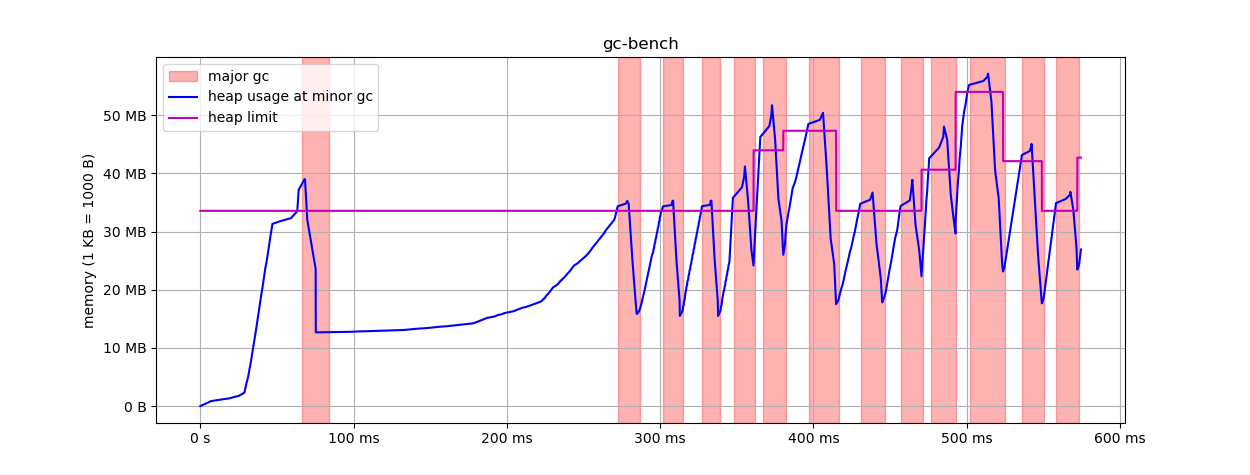

g_m: 0
heap_limit: 4219960.0, E: 0.0
g_m: 863368
heap_limit: 168393526.2529933, E: 164175566.2529933
g_m: 467304
heap_limit: 131013204.11804754, E: 126795244.11804754
g_m: 437112
heap_limit: 130932142.63411927, E: 126714182.63411927
g_m: 564184
heap_limit: 141550534.50013462, E: 137332574.50013462
g_m: 689832
heap_limit: 161419410.60077336, E: 157201450.60077336
g_m: 690384
heap_limit: 179217437.4214374, E: 174999477.4214374
g_m: 688736
heap_limit: 194725158.82563803, E: 190507198.82563803
g_m: 689608
heap_limit: 209560528.2818463, E: 205342568.2818463
g_m: 690928
heap_limit: 223814558.6007291, E: 219596598.6007291
g_m: 689856
heap_limit: 237677616.07553968, E: 233459656.07553968
g_m: 689888
heap_limit: 250304242.6157647, E: 246086282.6157647
g_m: 690296
heap_limit: 263228866.88603407, E: 259010906.88603407
g_m: 689144
heap_limit: 275340966.87470895, E: 271123006.87470895
g_m: 691448
heap_limit: 287096077.04459524, E: 282878117.04459524
g_m: 689200
heap_limit: 298657238.72639716, E: 29

In [23]:
gcbench_events = get_events_from("logs/gcbench-2")
#minor = [event for event in gcbench_events if event["task"] == "gc-minor"]
#major = [event for event in events if event["task"] == "gc-collect-step"]
#both = [event for event in events if event["task"] == "gc-minor" or event["task"] == "gc-collect-step"]
#plot_gc_hex(gcbench_events, "gc-bench", 0)
plot_gc(gcbench_events, "gc-bench", 1)
plot_membalancer_heap_rule(gcbench_events,1)

In [16]:
(22387224.361450195/0.01584593432617187)/1024/1024

1347.3563912149077

In [21]:
(590242.7123140154/0.0010098896591478387)/1024/1024

557.3869482482107

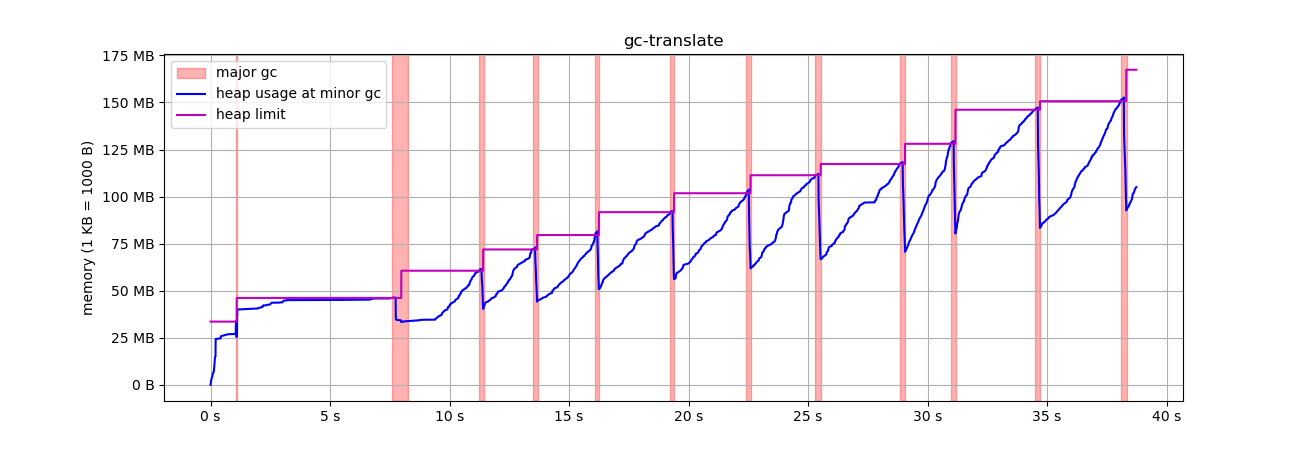

g_m: 0
heap_limit: 4219960.0, E: 0.0
g_m: 863576
heap_limit: 20179235.76364489, E: 15961275.763644889
g_m: 574464
heap_limit: 18264892.404052094, E: 14046932.404052094
g_m: 882248
heap_limit: 18555567.695419885, E: 14337607.695419883
g_m: 397496
heap_limit: 17515365.96355789, E: 13297405.963557893
g_m: 817656
heap_limit: 17483984.272760406, E: 13266024.272760406
g_m: 1017704
heap_limit: 15711776.545997625, E: 11493816.545997625
g_m: 1251096
heap_limit: 16426515.939274888, E: 12208555.939274888
g_m: 279560
heap_limit: 15480615.995652366, E: 11262655.995652366
g_m: 474392
heap_limit: 15505420.000832235, E: 11287460.000832235
g_m: 244216
heap_limit: 15323125.864956724, E: 11105165.864956724
g_m: 352208
heap_limit: 14908212.272414217, E: 10690252.272414217
g_m: 1089360
heap_limit: 15675141.488397144, E: 11457181.488397144
g_m: 921240
heap_limit: 16151341.849992448, E: 11933381.849992448
g_m: 932696
heap_limit: 16624203.899617787, E: 12406243.899617787
g_m: 944568
heap_limit: 17077645.61042

In [11]:
gctranslate_events = get_events_from("logs/gctranslate-2")
minor = [event for event in gctranslate_events if event["task"] == "gc-minor"]
t_minor_start = np.array([int(event["start"], 16)  for event in minor], dtype=float)
#plot_gc_hex(gctranslate_events, "gc-translate", 2)
plot_gc(gctranslate_events, "gc-translate", fignum=3)
plot_membalancer_heap_rule(gctranslate_events, 3)